In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
train_data = pd.read_csv("playground-series-s4e7/train.csv")

In [7]:
# Display the first few rows of the dataset
print(train_data.head())

   id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   0    Male   21                1         35.0                   0   
1   1    Male   43                1         28.0                   0   
2   2  Female   25                1         14.0                   1   
3   3  Female   35                1          1.0                   0   
4   4  Female   36                1         15.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0    1-2 Year            Yes         65101.0                 124.0      187   
1   > 2 Years            Yes         58911.0                  26.0      288   
2    < 1 Year             No         38043.0                 152.0      254   
3    1-2 Year            Yes          2630.0                 156.0       76   
4    1-2 Year             No         31951.0                 152.0      294   

   Response  
0         0  
1         1  
2         0  
3         0  
4         0  


In [8]:
# Check the shape of the dataset
print(f"Dataset shape: {train_data.shape}")

Dataset shape: (11504798, 12)


In [9]:
# Check the data types of each column
print(train_data.dtypes)

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object


In [10]:
# Check for unique values in the 'id' column
print(f"Number of unique IDs: {train_data.id.nunique()}")

Number of unique IDs: 11504798


In [11]:
# Drop the 'id' column as it is not useful for the model
train_data.drop(columns=['id'], inplace=True)

In [12]:
# Check for missing values
print(f"Missing values:\n{train_data.isnull().mean()}")

Missing values:
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64


In [13]:
# Display unique values for each column
for var in train_data.columns:
    print(f"{var}: {train_data[var].unique()[:20]} | {train_data[var].nunique()}\n")

Gender: ['Male' 'Female'] | 2

Age: [21 43 25 35 36 31 23 47 26 66 22 27 24 79 34 20 42 40 50 67] | 66

Driving_License: [1 0] | 2

Region_Code: [35. 28. 14.  1. 15. 47. 45.  8. 11.  3. 10. 12. 37. 50. 30. 46. 29. 16.
 26. 25.] | 54

Previously_Insured: [0 1] | 2

Vehicle_Age: ['1-2 Year' '> 2 Years' '< 1 Year'] | 3

Vehicle_Damage: ['Yes' 'No'] | 2

Annual_Premium: [65101. 58911. 38043.  2630. 31951. 28150. 27128. 40659. 31639. 27996.
 38104. 43746. 23692. 66887. 30226. 36389. 25769. 40797. 29698. 27677.] | 51728

Policy_Sales_Channel: [124.  26. 152. 156. 160.   8.  31. 157.  60. 122.  15.  30. 147.   1.
  63. 136. 154.  18. 135. 151.] | 152

Vintage: [187 288 254  76 294 197 190 262  36 125 215  30 203 259 245 150 240 242
 117 151] | 290

Response: [0 1] | 2



In [14]:
continuous = list(train_data.select_dtypes(exclude="O").columns)[:-1]
categorical = list(train_data.select_dtypes(include="O").columns)

print(f"There are {len(continuous)} continuous variables: {continuous}")
print(f"There are {len(categorical)} categorical variables: {categorical}")

# Check the number of unique values in categorical variables
print(train_data[categorical].nunique())

There are 7 continuous variables: ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
There are 3 categorical variables: ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
Gender            2
Vehicle_Age       3
Vehicle_Damage    2
dtype: int64


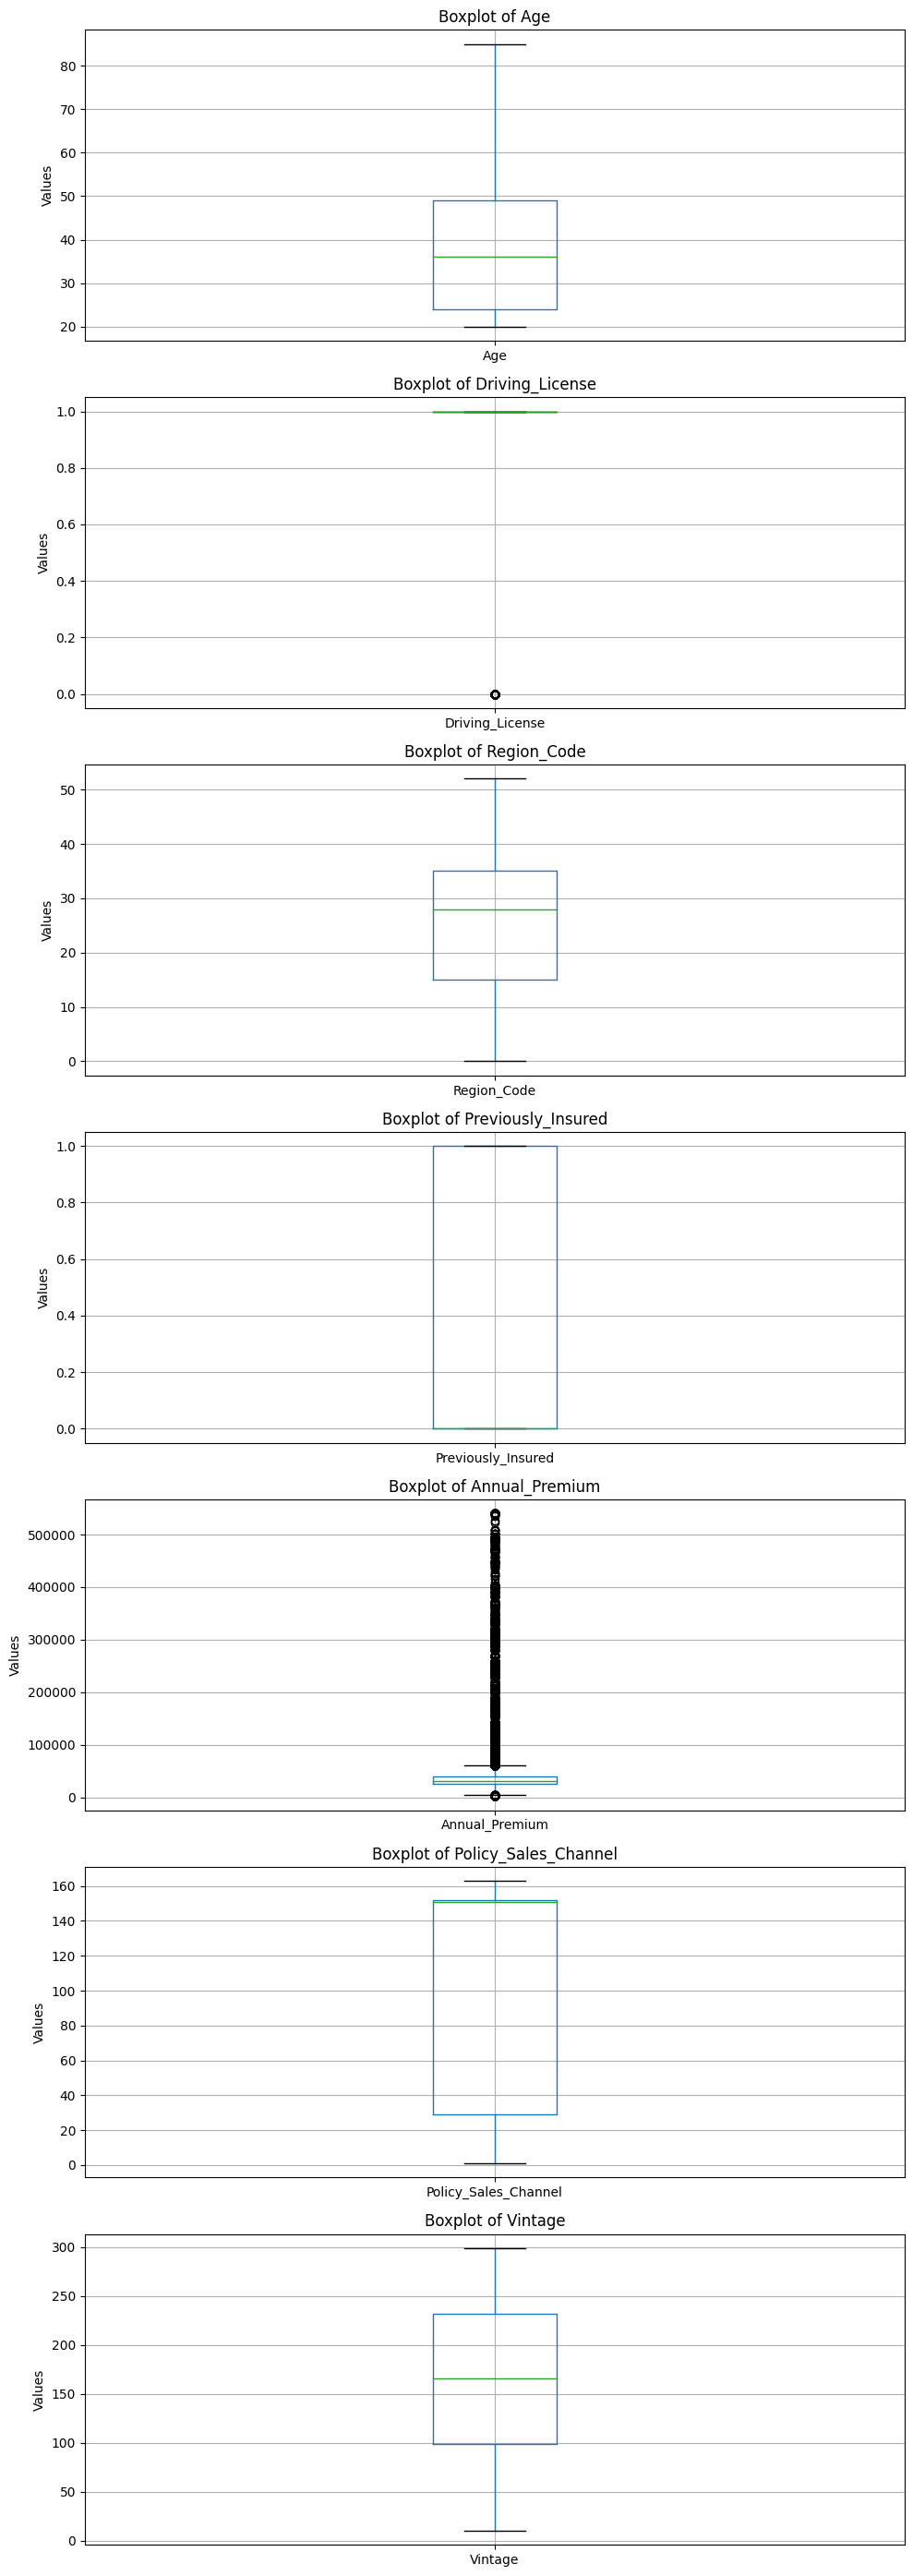

In [15]:
num_cols = len(continuous)
fig, axes = plt.subplots(num_cols, 1, figsize=(10, 4 * num_cols))

for i, col in enumerate(continuous):
    train_data.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

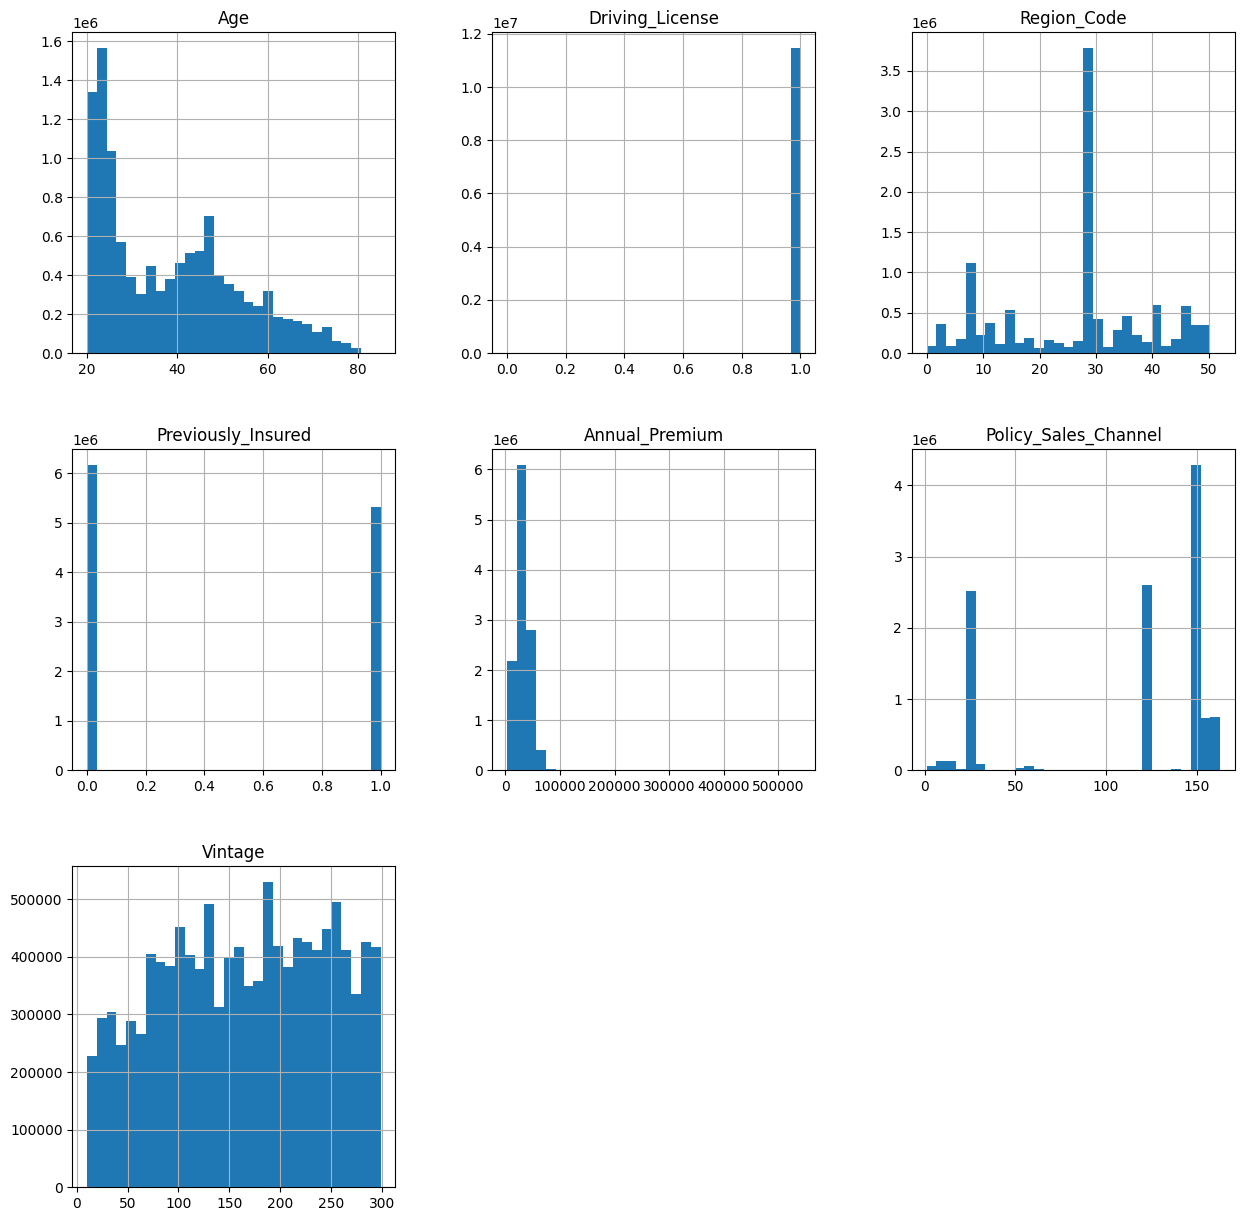

In [16]:
train_data[continuous].hist(bins=30, figsize=(15, 15))
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

X = train_data.drop('Response', axis=1)
y = train_data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(f"Train set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Train set shape: (8053358, 10), Test set shape: (3451440, 10)


In [18]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

In [19]:
catboost_classifier = CatBoostClassifier(random_seed=0, verbose=100)

In [20]:
catboost_classifier.fit(X_train, y_train, cat_features=categorical)


Learning rate set to 0.479497
0:	learn: 0.3022539	total: 4.54s	remaining: 1h 15m 41s
100:	learn: 0.2542117	total: 5m 17s	remaining: 47m 8s
200:	learn: 0.2523167	total: 10m 4s	remaining: 40m 2s
300:	learn: 0.2515340	total: 14m 45s	remaining: 34m 15s
400:	learn: 0.2510454	total: 19m 37s	remaining: 29m 19s
500:	learn: 0.2506862	total: 24m 22s	remaining: 24m 17s
600:	learn: 0.2503823	total: 29m 30s	remaining: 19m 35s
700:	learn: 0.2501165	total: 34m 42s	remaining: 14m 48s
800:	learn: 0.2498607	total: 39m 28s	remaining: 9m 48s
900:	learn: 0.2496273	total: 44m 16s	remaining: 4m 51s
999:	learn: 0.2494318	total: 49m 4s	remaining: 0us


In [21]:
X_train_preds = catboost_classifier.predict_proba(X_train)[:, 1]
X_test_preds = catboost_classifier.predict_proba(X_test)[:, 1]

In [22]:
print('Train set')
print('xgb roc-auc: {:.4f}'.format(roc_auc_score(y_train, X_train_preds)))

print('Test set')
print('xgb roc-auc: {:.4f}'.format(roc_auc_score(y_test, X_test_preds)))

Train set
xgb roc-auc: 0.8829
Test set
xgb roc-auc: 0.8805


In [23]:
# Continue training
catboost_classifier.fit(X_train, y_train, cat_features=categorical, init_model=catboost_classifier)

Learning rate set to 0.479497
0:	learn: 0.2494301	total: 3.53s	remaining: 58m 45s
100:	learn: 0.2492273	total: 4m 51s	remaining: 43m 19s
200:	learn: 0.2490159	total: 9m 37s	remaining: 38m 14s
300:	learn: 0.2488348	total: 14m 22s	remaining: 33m 23s
400:	learn: 0.2486575	total: 19m 7s	remaining: 28m 34s
500:	learn: 0.2484823	total: 23m 53s	remaining: 23m 47s
600:	learn: 0.2483146	total: 28m 43s	remaining: 19m 4s
700:	learn: 0.2481544	total: 33m 32s	remaining: 14m 18s
800:	learn: 0.2479964	total: 38m 18s	remaining: 9m 31s
900:	learn: 0.2478519	total: 44m 24s	remaining: 4m 52s
999:	learn: 0.2477068	total: 50m 9s	remaining: 0us


In [24]:
X_train_preds = catboost_classifier.predict_proba(X_train)[:, 1]
X_test_preds = catboost_classifier.predict_proba(X_test)[:, 1]

In [25]:
print('Continued Train set')
print('catboost roc-auc: {:.4f}'.format(roc_auc_score(y_train, X_train_preds)))

print('Continued Test set')
print('catboost roc-auc: {:.4f}'.format(roc_auc_score(y_test, X_test_preds)))

Continued Train set
catboost roc-auc: 0.8851
Continued Test set
catboost roc-auc: 0.8805


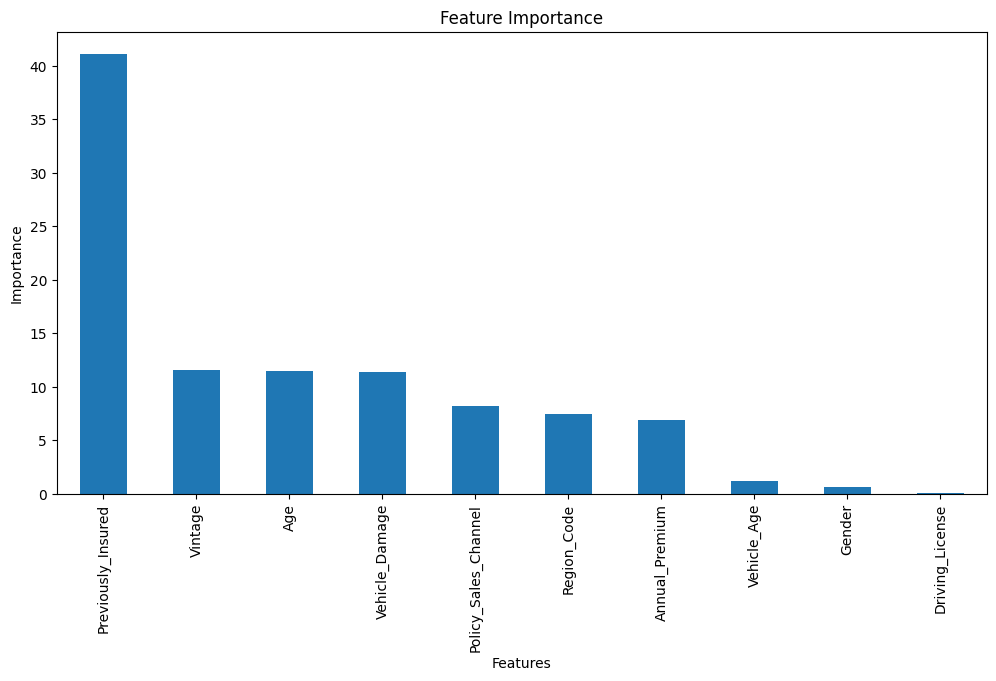

In [26]:
importance = pd.Series(catboost_classifier.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot.bar(figsize=(12,6))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [27]:
test_data = pd.read_csv("playground-series-s4e7/test.csv")

In [28]:
test_ids = test_data['id']
test_data.drop(columns = ["id"], inplace = True)

In [29]:
mappings_list = [{'Male': 0, 'Female': 1}, {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}, {'Yes': 1, 'No': 0}]
test_data["Gender"] = test_data["Gender"].map(mappings_list[0])
test_data["Vehicle_Age"] = test_data["Vehicle_Age"].map(mappings_list[1])
test_data["Vehicle_Damage"] = test_data["Vehicle_Damage"].map(mappings_list[2])

In [30]:
predictions_test = catboost_classifier.predict_proba(test_data)[:, 1]

In [31]:
result = pd.DataFrame({'id': test_ids, 'Response': predictions_test.flatten()}, columns=['id', 'Response'])
result.to_csv("playground-series-s4e7/submission.csv", index=False)